### Setup - Jupyter
The following code is needed to setup the jupyter notebook in the correct way.
**Please make sure it is executed** *(clicking at it and than press "run" (triangle) - on some systems "Shift+Enter" might work)*
Further comments in the code might facilitade understanding **, but are not mandatory for the general audience.**

# **If you don't know what to do, just Scroll down and try to follow the instructions.**

In [58]:
###
# general jupyter setup
import numpy as np # using powerful arrays

#using interactive widgets in a jupyter notebook
import micropip
await micropip.install('ipywidgets')
from ipywidgets import interactive, fixed
style = {'description_width': 'initial'}

# make things look nice
from IPython.display import display, Markdown

# libraty for ordinary differential equations
from scipy.integrate import odeint # This is an important library

#########################################################################
# plotting & making nice plots
from matplotlib import pyplot as plt # plotting

from matplotlib.ticker import FormatStrFormatter
from matplotlib import rcParams
rcParams['font.family'] = 'monospace'
rcParams['font.size'] = 12#32#'monospace'

rcParams['axes.linewidth'] = 3

from matplotlib.pyplot import figure

rcParams['xtick.major.pad']='15'
rcParams['ytick.major.pad']='15'

rcParams['ytick.major.size']	=10
rcParams['ytick.major.width']	=3

rcParams['xtick.major.size']	=10
rcParams['xtick.major.width']	=3

rcParams['xtick.direction']		="in"
rcParams['ytick.direction']		="in"


DATA_COLOR	=(0,0,1,1)

MODEL_COLOR	=(0.2,0.2,0.2,1.0)
MODEL_AREA	=(0.7,0.7,0.7,1.0)

AGENT_COLOR	=(1,0.2,0.2,1)
############################################################################
# differential equations for the the cell cycle model
# Please see Section **2.2. A mathematical model of the cell cycle** for further background

def differential_cellcycle_m3(y, t,alpha, beta, gamma, alpha_null):
    '''
    model3:Synthetic
                G0/G1-{alpha_0}-v
    [...] -> 	G1 -{alpha}-> 	S -{beta}-> 	G2/M -{gamma}-> [...] 

        alpha_0, alpha, beta and gamma are constant.
    
    args:
    [alpha,beta,gamma, alpha_null]
    
    code:	
    differential_cellcycle_m3(y, t, args):	
        [...]
        N 		= y[0]
        G1 	= y[1]
        S 		= y[2]
        G2M 	= y[3]
        G0G1	= y[4]

            f0 	= gamma * G2M 											# dN/dt
            f1	= 2 * gamma * G2M 	- alpha * G1 						# dG1/dt
            f2 	= alpha * G1		+ alpha_null * G0G1		- beta * S	# dS/dt
            f3	= beta * S 			- gamma * G2M						# dG2M/dt
            f4	= -1 * alpha_null * G0G1								# dG0G1/dt
        [...]
    '''
    
    N 		= y[0]
    G1 		= y[1]
    S 		= y[2]
    G2M 	= y[3]
    G0G1	= y[4]

    f0 	= gamma * G2M 											# dN/dt
    f1	= 2 * gamma * G2M 	- alpha * G1 						# dG1/dt
    f2 	= alpha * G1		+ alpha_null * G0G1		- beta * S	# dS/dt
    f3	= beta * S 			- gamma * G2M						# dG2M/dt
    f4	= -1 * alpha_null * G0G1								# dG0G1/dt

    return [f0, f1, f2, f3, f4]

############################################################################
# a logistic funtion for the simulation
def cellcycle(var,numbers,U=0.05,time=[0],model="-"):
    '''
    cellcycle(var,numbers,U=0.05,time=[0],model="-")
    
    This is what MultiNested should use.
    Please look up the program code for a detailled help.
    
    in short:
    INPUT:

        var     :   m3:     [alpha,beta,gamma, alpha_null]
                    alpha:      cells that go : g1   -> s      # per hour
                    beta:       cells that go : s    -> g2m    # per hour
                    gamma:      cells that go : g2m  -> g1     # per hour
                    alpha_null: cells that go : g0g1 -> s      # per hour
                        
        numbers    =[N_0, G0G1_0, S_0, G2M_0]    # initial percentage of cells in each phase
        U        = e.g. 0.05 for 5%            # cells of unknown phase in the facs
        time    =[0,0.001,...,t_max]        # time grid. so including time max and resolution.
                                            np.linspace(0,tmax,N_t)
        model    :{"model3"} # further models might be available later
    
    ILLUSTRATION:
        
    *    model3:
                    G0/G1-{alpha_0}-v
        [...] ->     G1 -{alpha}->     S -{beta}->     G2/M -{gamma}-> [...] 
            
            alpha_0, alpha, beta and gamma are constant.    
                                      
    OUTPUT:        
        model3:
            return [N, output_G1, output_S, output_G2M, output_G0G1]
    '''
    
    # Check whether the model was chose correctly 
    
    if model == "-":
        print("*** ERROR ***")
        print("variable $model wasn't specified!")
        print("please chose a model.")
        print("\nType: help(cellcycle) for further information.")
        sys.exit()
    
    elif (model != "model3"):
        print("*** ERROR ***")
        print("variable $model was not correctly specified!")
        print(""+str(model)+" is not in the list of available models.")
        print("Please chose from:")
        print("{ \"model1\", \"model2a\", \"model2b\", \"model3\" } ")
        print("\nType: help(cellcycle) for further information.")
        sys.exit()    
    
    # Check whether the right number of arguments was assignedSynthetic
    
    if (model == "model3"):
        if len(var) != 4:
            print("*** ERROR ***")
            print("model3 takes exactly 5 arguments.")
            print("[alpha, beta, gamma, alpha_null]\n")
            print("current input:")
            print(str(var)+"\t# len(var)!=4")
            sys.exit()
        if len(numbers) != 5:
            print("*** ERROR ***")
            print("model3 takes exactly 4 start values.")
            print("[N_0, G1_0, S_0, G2M_0, G0G1_0]\n")
            print("current input:")
            print(str(numbers)+"\t# len(numbers)!=5")
            sys.exit()
    
    if (model == "model3"):
        # initial conditions
        N_0        =    numbers[0]    # N_0 should be always 0! initial cell population : 100 % 
        G1_0    =    numbers[1]    # initial cells in g1 phase
        S_0        =    numbers[2]    # initial cells in s phase
        G2M_0    =    numbers[3]    # initial cells in g2m phase
        G0G1_0    =    numbers[4]    # initial cells in g0g1 phase after cell synchronisation
        
        # normalise G1_0, S_0, G2M_0 and G0G1_0 to 100%.
        SUMME    =    G1_0 + S_0 + G2M_0 + G0G1_0
        _G1_0    =    G1_0/SUMME    
        _S_0    =    S_0/SUMME
        _G2M_0    =    G2M_0/SUMME
        _G0G1_0    =    G0G1_0/SUMME

        G1_0    = _G1_0
        S_0        = _S_0
        G2M_0    = _G2M_0
        G0G1_0    = _G0G1_0

        # initialise everything:
        y0 = [N_0, G1_0, S_0, G2M_0, G0G1_0]   # initial conditions of the cell cycle
    
    
    # Do the actual calculations and solve the differential equations
    if (model == "model3"):
        soln = odeint(differential_cellcycle_m3, y0, time,args=tuple(var))
        N = soln[:, 0]
        G1 = soln[:, 1]
        S = soln[:, 2]
        G2M = soln[:, 3]
        G0G1 = soln[:, 4]
    
        #reconvert including the unknows, normalize.
        output_G1    = (G1)/N * (1-U) 
        output_S    = (S)/N * (1-U)
        output_G2M    = (G2M)/N * (1-U)
        output_G0G1    = (G0G1)/N * (1-U)
        
        output=[N, output_G1, output_S, output_G2M, output_G0G1]
    
    return output

############################################################################
# This part coordinates the input and output.
# One could call it the actual simulation.
def simulate_cellcycle_noise(MRT_G1=1/0.0641,
                       MRT_G0G1=1/0.5436,
                       MRT_S=1/0.2124,
                       MRT_G2M=1/0.0999,
                       N_t0=1,
                       G1_t0=0.1,
                       G0G1_t0=0.7,
                       S_t0=0.05,
                       G2M_t0=0.15,
                       U=0.05,
                       SD_N=0.20,
                       SD_CC=0.05,
                       sampling_interval=12):
    '''Plot the cell cycle simulation
    
    This wrapper of the cell cycle simulation uses "mean residence time" for each cell phases instead of the variables alpha, alpha_0, beta, gamma.
    The conversion is done by:
    
    MeanResidenceTime_G0 = 1/alpha
    MeanResidenceTime_G0G1 = 1/alpha_0
    MeanResidenceTime_S = 1/beta
    MeanResidenceTime_G2M = 1/gamma
    '''
    
    alpha   = 1/ MRT_G1 
    alpha_null = 1/ MRT_G0G1 
    beta    = 1/ MRT_S
    gamma   = 1/ MRT_G2M
    
    var=[alpha, beta, gamma,alpha_null]		# each parameter per hour
    numbers=[N_t0, G1_t0, S_t0, G2M_t0, G0G1_t0]		# initial percentage of cells in each phase
    TIME=np.linspace(0,144,72*6+1)
    TIME2=np.linspace(0,73,74)[::sampling_interval]
    
    ###
    # perform actual calculation
    
    N, G1, S, G2M, G0G1 =cellcycle(var,numbers,U,TIME2,"model3")
    
    ###
    # Introducing the noise
    N_noise     = N           * np.random.normal(loc=1, scale=SD_N,  size=len(TIME2))
    G0G1_noise  = (G1 + G0G1) + np.random.normal(loc=0, scale=SD_CC, size=len(TIME2))
    S_noise     = S           + np.random.normal(loc=0, scale=SD_CC, size=len(TIME2))
    G2M_noise   = G2M         + np.random.normal(loc=0, scale=SD_CC, size=len(TIME2))
    #values can not be smaller than 0
    G0G1_noise[G0G1_noise<0]=0
    S_noise[S_noise<0]=0
    G2M_noise[G2M_noise<0]=0
    td = (TIME2[-1]-TIME2[0]) / (np.log2(N_noise[-1]/N_noise[0]))
    
    N, G1, S, G2M, G0G1 =cellcycle(var,numbers,U,TIME,"model3")
    
    ###
    # perform the plotting
    TIME += 0
    fig, ax = plt.subplots(1,4, figsize=(16, 4), dpi=100, facecolor='w', edgecolor='k')
    MODEL_NOISE_COLOR = (1,0,0,0.5)
    
    ###########################################The#####################################
    parameter		= N
    sbplot_no       = 0
    
    ax[sbplot_no].plot(TIME, parameter*100,color=MODEL_COLOR, label='DIFF EQ. SIM',linewidth =3)
    ax[sbplot_no].plot(TIME2, N_noise*100,color=MODEL_NOISE_COLOR, label='DIFF EQ. SIM',marker='o', markersize = 4)
    ax[sbplot_no].plot(TIME, (N_noise[0]*2**(TIME/td))*100,color=(0.3,0,1,0.3), label='DIFF EQ. SIM', linewidth =2)
        
    ax[sbplot_no].set_xticks([0,12,24,36,48,60,72])
    ax[sbplot_no].set_yticks([0,100,200,400,600,800])
    ax[sbplot_no].set_xlabel('Time (h)')
    ax[sbplot_no].set_ylabel('Population [%]')
    ax[sbplot_no].set_title("N")
    #plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0., prop={'size': 36})
    ax[sbplot_no].axis([-2,74,0,850])
    
    ################################################################################
    parameter		= G0G1+G1
    sbplot_no       = 1
    
    ax[sbplot_no].plot(TIME, parameter*100,color=MODEL_COLOR, label='DIFF EQ. SIM',linewidth =3)
    ax[sbplot_no].plot(TIME2, G0G1_noise*100,color=MODEL_NOISE_COLOR, label='DIFF EQ. SIM',marker='o', markersize = 4)
    
    # plotting G0G1 alone
    MODEL_COLOR_G0G1=(0.1,0.4,0.0,0.5)
    ax[sbplot_no].plot(TIME, G0G1*100,color=MODEL_COLOR_G0G1,linewidth =3, zorder=1)
    # plotting G1 alone
    MODEL_COLOR_G1=(0.0,0.0,0.8,0.5)
    ax[sbplot_no].plot(TIME, G1*100,color=MODEL_COLOR_G1,linewidth =3, zorder=2)
         
    ax[sbplot_no].set_xticks([0,12,24,36,48,60,72])
    ax[sbplot_no].set_yticks([0,20,40,60,80])
    ax[sbplot_no].set_xlabel('Time (h)')
    ax[sbplot_no].set_ylabel(r'$G_0 / G_1\; \left[\%\right]$')
    ax[sbplot_no].set_title(r'$G_0 / G_1$')
    #plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0., prop={'size': 36})
    ax[sbplot_no].axis([-2,74,0,85])  
    
    ################################################################################
    parameter		= S
    sbplot_no       = 2
    
    ax[sbplot_no].plot(TIME, parameter*100,color=MODEL_COLOR, label='DIFF EQ. SIM',linewidth =3)
    ax[sbplot_no].plot(TIME2, S_noise*100,color=MODEL_NOISE_COLOR, label='DIFF EQ. SIM',marker='o', markersize = 4)
             
    ax[sbplot_no].set_xticks([0,12,24,36,48,60,72])
    ax[sbplot_no].set_yticks([0,10,20,30,40,50])
    ax[sbplot_no].set_xlabel('Time (h)')
    ax[sbplot_no].set_ylabel(r'$S\; \left[\%\right]$')
    ax[sbplot_no].set_title(r'$S$')
    #plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0., prop={'size': 36})
    ax[sbplot_no].axis([-2,74,0,53.125])  
    
    ################################################################################
    parameter		= G2M
    sbplot_no       = 3
    
    ax[sbplot_no].plot(TIME, parameter*100,color=MODEL_COLOR, label='DIFF EQ. SIM',linewidth =3)
    ax[sbplot_no].plot(TIME2, G2M_noise*100,color=MODEL_NOISE_COLOR, label='DIFF EQ. SIM',marker='o', markersize = 4)
    
    
    ax[sbplot_no].set_xticks([0,12,24,36,48,60,72])
    ax[sbplot_no].set_yticks([0,10,20,30,40,50])
    ax[sbplot_no].set_xlabel('Time (h)')
    ax[sbplot_no].set_ylabel(r'$G_2 / M\; \left[\%\right]$')
    ax[sbplot_no].set_title(r'$G_2 / M$')
    #plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0., prop={'size': 36})
    ax[sbplot_no].axis([-2,74,0,53.125])  
    
    plt.tight_layout()
    
    display(Markdown('---'))
    display(Markdown('# Graphical Output'))
    plt.show()
    #plt.show()
    
    display(Markdown('---'))
    # calculating the mean doubling time
    '''
    display(Markdown('# Mean doubling time'))
    display(Markdown('The formula used is: $t_{D,calc} = (t_2 - t_1)\;/\;{log_2(N(t_2)}/{N(t_1)})$'))
    display(Markdown('The values of the variables are:'))
    display(Markdown('$t_1 = %i \, hrs; \; t_2 = %i\, hrs$'%(TIME2[0],TIME2[-1])))
    display(Markdown('$N(t_1) = %i \, percent \; N(t_2) = %i\, percent$ '%(N_noise[0]*100,N_noise[-1]*100)))
    td = (TIME2[-1]-TIME2[0]) / (np.log2(N_noise[-1])/N_noise[0])
    ground_truth = MRT_G1 + MRT_S + MRT_G2M
    display(Markdown('#### Results'))
    display(Markdown('The ground truth $t_{D,gt}$ is defiend as the sum of the mean residence times (MRT_G1 + MRT_S + MRT_G2M)'))
    display(Markdown('The calculated **doubling time** is $t_{D,calc} = %.2f \, hrs$ - The **ground truth** is : $t_{D,gt} = %.2f \, hrs$'%(td,ground_truth) ))
    display(Markdown('#### Mean residence times based on doubling time'))
    display(Markdown('$MRT\_G1_{calc} = %.2f \, hrs$ - **ground truth** is: $MRT\_G1 = %.2f \, hrs$'%(td*G0G1_noise[-1], MRT_G1)))
    display(Markdown('$MRT\_S_{calc} = %.2f \, hrs$ - **ground truth** is: $MRT\_S = %.2f \, hrs$'%(td*S_noise[-1], MRT_S)))
    display(Markdown('$MRT\_G2M_{calc} = %.2f \, hrs$ - **ground truth** is: $MRT\_G2M = %.2f \, hrs$'%(td*G2M_noise[-1], MRT_G2M)))
    '''
    #display(Markdown(" **Mean Doubling Time** : $t_{D,calc} = %.2f $; $MRT\_G1_{calc} = %.2f \, hrs$; $MRT\_S_{calc} = %.2f \, hrs$; $MRT\_G2M_{calc} = %.2f \, hrs$ "%(td,td*G0G1_noise[-1],td*S_noise[-1],td*G2M_noise[-1])))
    
    display(Markdown("# Calculations based on synthetic test data"))
    
    import pandas as pd
    data = [         [round(td,2), ""], #MRT_G1+MRT_S+MRT_G2M], 
                     ["",round(MRT_G1+MRT_S+MRT_G2M,2)],
                      np.around([td*G0G1_noise[-1], MRT_G1],2), 
                      np.around([td*S_noise[-1], MRT_S],2), 
                      np.around([td*G2M_noise[-1], MRT_G2M],2)]
    display(pd.DataFrame(data, columns=["calculated", "input parameter value"], index=["doubling time t_D","Mean cell cycle time","MRT_G1","MRT_S","MRT_G2M"]))
    #display((N[0]*100)*2**(TIME/td))
    
        
    #return [N_noise,G0G1_noise,S_noise,G2M_noise]
    return
    

# Introduction to the applet
This applet is a (graphical) representation of the cell cycle model used by *W. Woranush et al (2022) "Quantifying the influence of soluble adenylate cyclase on cell cycle timing in human endothelial cells combining experimental data with a mathematical model by Bayesian inference" \[under review\]*  

This tool illustrates the biological experiment of synchronizing cell cycle and than observering the des

### Input Variables
The **Input Variables** represent model parameters and can be changed/tuned using the Sliders.
* Model Parameters
>From the main text we know: *While e.g. α describes the probability rate for cells to change from G 1 to S phase, the reciprocal 1/α describes the mean
residence time for cells to stay in G 1 phase.* (See Section *2.2 A mathematical model of the cell cycle*)
>* **MRT_G1**   : (Mean Residence Time in G1)   : [hours] : This variable corresponds to the mean time a cell spends in G1 phase   ($= 1 / \alpha$)
>* **MRT_G0G1** : (Mean Residence Time in G0G1) : [hours] : This variable corresponds to the mean time a cell spends in G0G1 phase ($= 1 / \alpha_0$)
>* **MRT_G1**   : (Mean Residence Time in S)    : [hours] : This variable corresponds to the mean time a cell spends in S phase    ($= 1 / \beta$)
>* **MRT_G1**   : (Mean Residence Time in G2M)  : [hours] : This variable corresponds to the mean time a cell spends in G2M phase  ($= 1 / \gamma$)
* Initial Conditions
>* **G1_t0**    : (Percentage of cells initially in G1)  : [%] : Initial cells G1 phase     ($= N_{G0}(t_0)$)
>* **G0G1_t0**  : (Percentage of cells initially in G0G1): [%] : Initial cells G0G1 phase   ($= N_{G0,G1}(t_0)$)
>* **S_t0**     : (Percentage of cells initially in S)   : [%] : Initial cells S phase      ($= N_{S}(t_0)$)
>* **G2M_t0**   : (Percentage of cells initially in G2M) : [%] : Initial cells G2M phase    ($= N_{G2,M}(t_0)$)
* Unclassified Count Estimator
>* **U**   : (Unclassified counts) : [%] : Takes into account that experimental flow cytometry data does not always add up to 100%    ($= U$)
* Simulation of Noise
>* **SD_N**   : (Standard deviation of cell number noise) : [-] : Standard deviation of gaussian distributed *relative* noise of the cell number : $value_{withNoise} = value_{simulated}\;*\;\mathcal{N}(\mu = 1,\,SD_{N})$
>* **SD_CC**   : (Standard deviation of cell cycle phases) : [-] : Standard deviation of gaussian distributed *absolute* noise of the cell cycle phases : $value_{withNoise} = value_{simulated}\;+\;\mathcal{N}(\mu = 0,\,SD_{CC})$)
* Sampling Interval
>* **sampling_interval** : (Sampling interval) : [hours] : Eight different sets of sampling intervals dt = \{ 1, 2, 4, 6, 12, 24, 36 or 72 \} hours and a total observation period of 72 h can be used. (dt)

### Graphical Output
The **model simulation** based on the *input parameters (Model Parameters, Initial Conditions and Unclassified Count Estimator)* is represented by a **black** line.
(Light green or light blue plots in the 2nd panel indicate cells in either G 0 /G 1 or G 1 phase, respectively.)
The **synthetic test data** - based on the model simulation, *Sampling Interval* and *Simulation of Noise* is represented by a **red** line with dots indicating synthetic data points.
(A light purple line in the 1st panel indicates an exponential growth based on the doubling time calculated based from the synthetic test data.)

According to experiments with flow cytometry data - the first diagram represents the total number of cells and the other diagrams represent the percentage of cells in the individual cell cycle phases.

### Calculations based on synthetic test data
The table shows the calculated **doubling time** - assuming an exponential growth. The formula used is: $t_{D,calc} = (t_2 - t_1)\;/\;{log_2(N(t_2)}/{N(t_1)})$.
Than *Mean Residence Times* are calculated according to
> *time spend in a cell cycle phase is the percentage of cells found in that phase multiplied by the doubling time*

The second colume shows the input parameter values. (The sum of mean residence times (MRT_G1 + MRT_S + MRT_G2M) is taken as doubling time.)

It becomes apparent that the caclulated values and the input parameter values do not match. Therefore, **this method of parameter estimation has to be questioned**.
One possible solution to this is illustrated in the proposed formalism by *W. Woranush et al (2022) "Quantifying the influence of soluble adenylate cyclase on cell cycle timing in human endothelial cells combining experimental data with a mathematical model by Bayesian inference" \[under review\]*

In [52]:
display(Markdown("# Input Variables"))
w=interactive(simulate_cellcycle_noise,
              MRT_G1=(0.1,144,0.1),
              MRT_G0G1=(0.1,144,0.1),
              MRT_S=(0.1,12,0.1),
              MRT_G2M=(0.1,72,0.1),
              N_t0=fixed(1),
              G1_t0=(0,1,0.01),
              G0G1_t0=(0,1,0.01),
              S_t0=(0,1,0.01),
              G2M_t0=(0,1,0.01),
              U=(0,0.2,0.01),
              SD_N=(0,0.3,0.01),
              SD_CC=(0,0.3,0.01),
              sampling_interval=[1,2,4,6,12,24,36,72]
              )
w



# Input Variables

interactive(children=(FloatSlider(value=15.600624024960997, description='MRT_G1', max=144.0), FloatSlider(valu…

---
# Thought experiment
Reviewer 1 suggested that (**statement 1**) *Mean Residence Times* could be calculated according to
> *time spend in a cell cycle phase is the percentage of cells found in that phase multiplied by the doubling time.*

This approach sounds simple and intuitive. However, we will use this thought experiment to challenge it.

### Aim
This thought experiment should show whether **doubling times** commonly calculated as $t_{D,calc} = (t_2 - t_1)\;/\;{log_2(N(t_2)}/{N(t_1)})$ are a good tool to assess:
> 1. The mean time a cell needs to complete the cell cycle
> 2. Allows to asses the time cells spend in the individual phases of the cell cycle.
### Idea
We imagine a perfect experiment with no measurement error and no biological heterogenity. Further, we imagine a somehow mutated cell type that needs 3 hours to complete the cell cycle - during this 3 hours it spends 1 hour in G1, S and G2M phase each.
### Elaboration
We start with 3 cells of this cell type. In this thought experiment they were collected from an experiment in which cells had enough time to de-synchroniz. By chance there is one cells in G1, S and G2M phase each at time point t=0 - so that according to **statement 1** cell cycle phase percentage of cells found in that phase are proportional to the time a cell spends in each phase.

We can summarize the status of our model at t=0:
> t=0; N_total = 3, N(G1)=1 (33 \%); N(S)=1 (33 \%); N(G2M)=1 (33 \%)

Now, we start the experiment and elaborate: After one hour at t=1, statistically one cell from G1 moved to S, one cell from S went on to G2M and one cell previously in G2M divided and two new cells emerged at G1 phase. Hence, there are 4 cells.
So the status of our model is:

> t=1; N_total = 4, N(G1)=2 (50 \%); N(S)=1 (25 \%); N(G2M)=1 (25 \%)

However, at this moment the model came from what we assumed to be an equilibrium state and changedtowards a different state.

We proceed. elaborating the state of the model:

> t=2; N_total = 5, N(G1)=2 (40 \%); N(S)=2 (40 \%); N(G2M)=1 (20 \%)

The equilibrium state is only eached again at t=3:

> t=3; N_total = 6, N(G1)=2 (33 \%); N(S)=2 (33 \%); N(G2M)=2 (33 \%)

### Results
#### Cell doubling time
Calculating the doubling time of the cells we would get the following results for the individual time points:
>* t=1, $t_{D,calc}(t=1) = 2.4094 \, h$
>* t=2, $t_{D,calc}(t=2) = 2.7138 \, h$
>* t=3, $t_{D,calc}(t=3) = 3.0000 \, h$

One could ask in turn how many cells should have been found at t=1 and t=2 - **if** the doubling time of $t_{D,calc}(t=3) = 3.0000\, h$ describes the process sufficiently correct:

>* t=1, $N\_total_{calc} (tt_{D,calc}(t=3)=3)\;=\;3*2^{1/3}\;=\; 3.7798 \,cells \;\neq\; 4.000\, cells$
>* t=2, $N\_total_{calc} (tt_{D,calc}(t=3)=3)\;=\;3*2^{2/3}\;=\; 4.7622 \,cells \;\neq\; 5.000\, cells$

#### Mean Residence Times:
Calculating the *Mean Residence Time* for each individual cell cycle phase for the individual time points:
>* t=1, $MRT\_G1_{calc}(t=1) = 1.2047\, h$, $MRT\_S_calc(t=1) = 0.6024\, h$, $MRT\_G2M_calc(t=1) = 0.6024\, h$
>* t=1, $MRT\_G1_{calc}(t=2) = 1.0855\, h$, $MRT\_S_calc(t=1) = 1.0855\, h$, $MRT\_G2M_calc(t=1) = 0.5428\, h$
>* t=1, $MRT\_G1_{calc}(t=3) = 1.0000\, h$, $MRT\_S_calc(t=1) = 1.0000\, h$, $MRT\_G2M_calc(t=1) = 1.0000\, h$

### Conclusion
This thought experiment shows that even under assumed **perfect conditions**
>* 1. The cell doubling time describes a growth process that does **not match** the underlying dynamics. 
>* 2. Due to cell division of cells in G2M - the equilibrium state of the cells in each phase is **not proportional** to the time cells spend in this phase.

As a conclusion **statement 1** has to be revoked. 

### Comments
>* 1. This further shows that the time a cell needs cell doubling time generally underestimates the *time a cell needs to complete the cell cycle*
>* 2. The *Mean Residence Time* calculated in this approach generally  **over-estimates** the duration of G1-phase while it generally **under-estimates** the duration of G2M-phase.

### One last thing
The above thought experiment is very simplified. However, it is still accurate enough to challenge the seemingly innocent **statement 1** on a logical level.

For further illustration we used our model to recreate this problem: Using 33 percent of cells in G1, S and G2M phase (- for simplivity we start with 0 cells in G0G1 phase).Further *Mean Residence Times* for all three phases are set to 8 hours. All noise (simulated measurement errors) of the synthetic test data is reduced to 0.

---

# Graphical Output

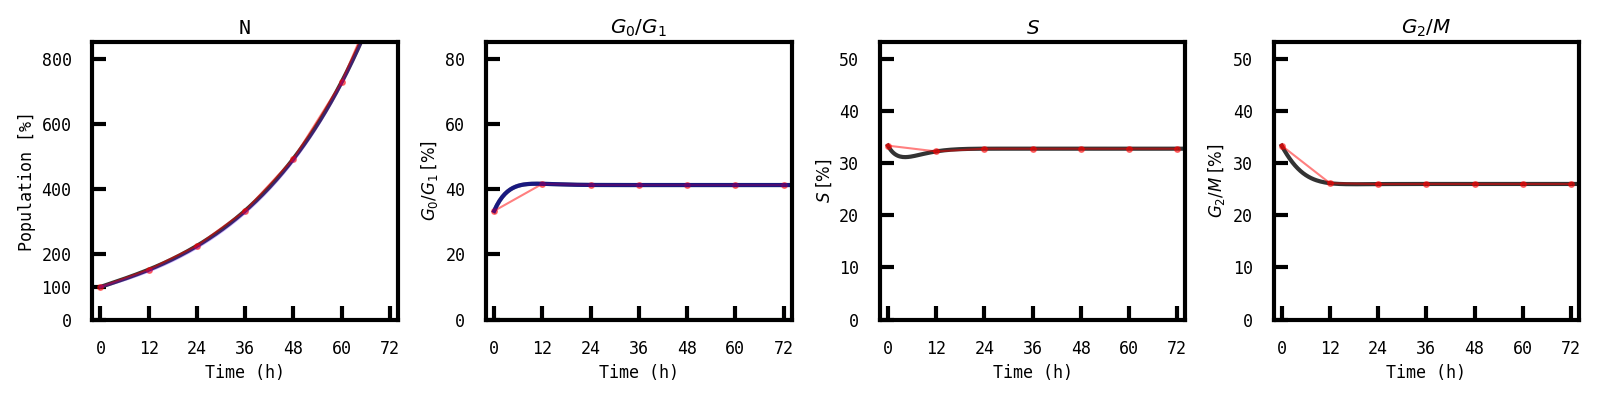

---

# Calculations based on synthetic test data

,calculated,input parameter value
doubling time t_D,21.02,
Mean cell cycle time,,24
MRT_G1,8.67,8.0
MRT_S,6.88,8.0
MRT_G2M,5.46,8.0


In [59]:
simulate_cellcycle_noise(MRT_G1=8, # 8 hours MRT_G1
              MRT_G0G1=8,          # 8 hours MRT_G0G1 - notice: There are no cells in G0G1 anyway.
              MRT_S=8,             # 8 hours MRT_S
              MRT_G2M=8,           # 8 hours MRT_G2M
              N_t0=1,              # 100 % total cells at t=0
              G1_t0=0.3333,        # 33.33 % of cells initially in G1
              G0G1_t0=0,           # 00.00 % of cells initially in G0G1
              S_t0=0.3333,         # 33.33 % of cells initially in S
              G2M_t0=0.3333,       # 33.33 % of cells initially in G2M
              U=0.0001,            # 0.01 % of the cells are **Unclassified**
              SD_N=0,              # 0 Noise for N
              SD_CC=0,             # 0 Noise for cell cycle phases
              sampling_interval=12)# Sampling intervall dt = 12 hours